In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import statistics 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(value = bmi_mean, inplace = True)

<AxesSubplot:ylabel='stroke'>

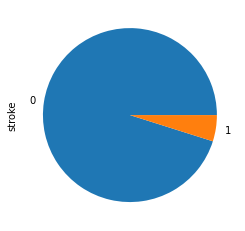

In [6]:
df['stroke'].value_counts() #unbalanced
df.stroke.value_counts().plot(kind = 'pie')

In [7]:
#categorical -> numeric

encoder = preprocessing.LabelEncoder()
df = df.apply(encoder.fit_transform)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,240,1,1
1,3610,0,82,0,0,1,3,0,3588,162,2,1
2,2151,1,101,0,1,1,2,0,2483,199,2,1
3,4226,0,70,0,0,1,2,1,3385,218,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


<AxesSubplot:>

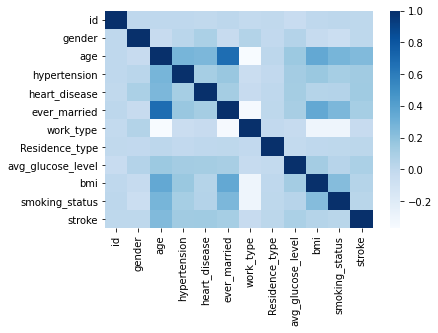

In [8]:
corr = df.loc[:, df.columns].corr()
sns.heatmap(corr, cmap = "Blues", annot = False)

In [9]:
X = df.loc[:, df.columns != 'stroke'].drop("id", axis=1)
y = df.loc[:, df.columns == 'stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

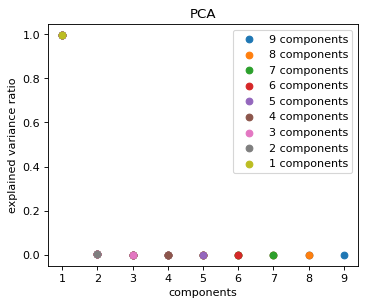

In [63]:
figure(figsize=(5, 4), dpi=80)
for i in range(X.shape[1]-1):
    i = X.shape[1]-2 - i
    pca = PCA(n_components=i+1)
    X_pca = pca.fit_transform(X)
    n = [i + 1 for i in range(pca.n_components_)]
    plt.scatter(n, pca.explained_variance_ratio_, 
                label = str(pca.n_components_) + " components")
    plt.title("PCA")
    plt.legend()
    plt.xlabel("components")
    plt.ylabel("explained variance ratio")

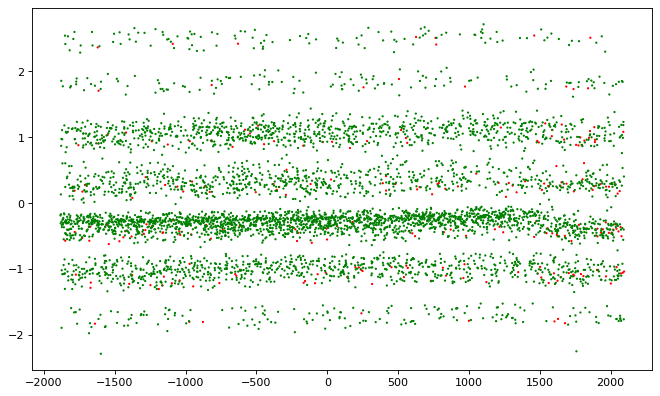

In [53]:
colors = ['green','red']
y_c = [colors[y['stroke'][i]] for i in range(len(y))]
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X_pca[:,0], X_pca[:,4], c=y_c, s=1)

[ 0.08886525  0.03965231 -0.23301236 -0.05394564 -0.01956043 -0.01147893
  0.01253725  0.06867904  0.05436119]


Text(0, 0.5, 'correlation with y')

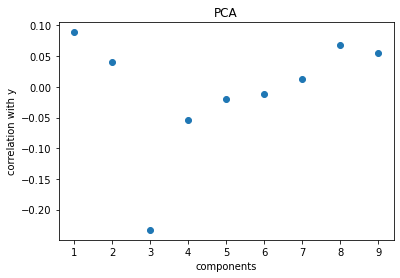

In [61]:
pca_data = np.hstack((X_pca, y)) 
df = pd.DataFrame(pca_data)
df.columns = np.hstack((np.array(n), np.array(["y"])))
corr = df.corr()
print(corr.values[-1][:-1])
plt.scatter(n, corr.values[-1][:-1])
plt.title("PCA")
plt.xlabel("components")
plt.ylabel("correlation with y")

In [14]:
kfold = StratifiedKFold(n_splits=10,shuffle = True, random_state = 42)

classifier = GaussianNB()
results = []
balanced_scores = []
for train_index, test_index in kfold.split(X_pca, y): 
    #X_train, X_test = np.hstack((X_pca[train_index][:,0:2], X_pca[train_index][:,3:10])) , np.hstack((X_pca[test_index][:,0:2], X_pca[test_index][:,3:10])) #.reshape(-1, 1) 
    X_train, X_test = X_pca[train_index][:,0:1], X_pca[test_index][:,0:1] #.reshape(-1, 1) 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(X_train, y_train)
    balanced_scores.append(balanced_accuracy_score(y_test,classifier.predict(X_test)))
    results.append(classifier.score(X_test, y_test))

print(statistics.mean(results))
print(statistics.mean(balanced_scores))

0.9512720156555773
0.5


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9477495107632093, 0.9119373776908023]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5000459012514682, 0.5801259178982769]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

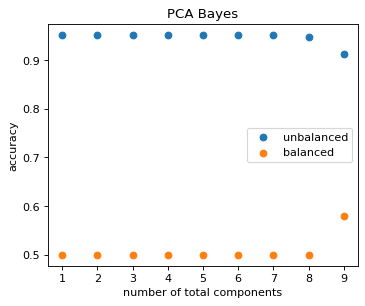

In [74]:
r = []
b = []

for i in range(X.shape[1]-1):
    pca = PCA(n_components=i+1)
    X_pca = pca.fit_transform(X)
    n = [i + 1 for i in range(pca.n_components_)]
    
    kfold = StratifiedKFold(n_splits=10,shuffle = True, random_state = 42)
    classifier = GaussianNB()
    results = []
    balanced_scores = []
    for train_index, test_index in kfold.split(X_pca, y): 
        #X_train, X_test = np.hstack((X_pca[train_index][:,0:2], X_pca[train_index][:,3:10])) , np.hstack((X_pca[test_index][:,0:2], X_pca[test_index][:,3:10])) #.reshape(-1, 1) 
        X_train, X_test = X_pca[train_index][:,:], X_pca[test_index][:,:] #.reshape(-1, 1) 
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        classifier.fit(X_train, y_train)
        balanced_scores.append(balanced_accuracy_score(y_test,classifier.predict(X_test)))
        results.append(classifier.score(X_test, y_test))
        
    r.append(statistics.mean(results))
    b.append(statistics.mean(balanced_scores))
    
figure(figsize=(5, 4), dpi=80)
plt.scatter(n, r, label = "unbalanced")
plt.scatter(n, b, label = "balanced")
plt.title("PCA Bayes")
plt.legend()
plt.xlabel("number of total components")
plt.ylabel("accuracy")
    
print(r)
print(b)

<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when

<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when

<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when

[0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773, 0.9512720156555773]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)
<ipython-input-72-db675e101851>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


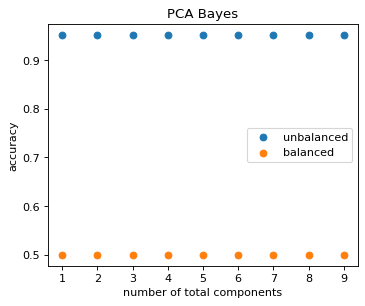

In [72]:
r = []
b = []

for i in range(X.shape[1]-1):
    pca = PCA(n_components=i+1)
    X_pca = pca.fit_transform(X)
    n = [i + 1 for i in range(pca.n_components_)]
    
    kfold = StratifiedKFold(n_splits=10,shuffle = True, random_state = 42)
    classifier = KNeighborsClassifier(n_neighbors=10)
    results = []
    balanced_scores = []
    for train_index, test_index in kfold.split(X_pca, y): 
        #X_train, X_test = np.hstack((X_pca[train_index][:,0:2], X_pca[train_index][:,3:10])) , np.hstack((X_pca[test_index][:,0:2], X_pca[test_index][:,3:10])) #.reshape(-1, 1) 
        X_train, X_test = X_pca[train_index][:,:], X_pca[test_index][:,:] #.reshape(-1, 1) 
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        classifier.fit(X_train, y_train)
        balanced_scores.append(balanced_accuracy_score(y_test,classifier.predict(X_test)))
        results.append(classifier.score(X_test, y_test))
        
    r.append(statistics.mean(results))
    b.append(statistics.mean(balanced_scores))
    
figure(figsize=(5, 4), dpi=80)
plt.scatter(n, r, label = "unbalanced")
plt.scatter(n, b, label = "balanced")
plt.title("PCA Bayes")
plt.legend()
plt.xlabel("number of total components")
plt.ylabel("accuracy")
    
print(r)
print(b)